In [ ]:
%pip install scikeras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 12)})
np_seed = 42
np.random.seed(np_seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
display(boston.head())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
y = boston['MEDV']
x = boston.drop('MEDV', axis = 1)
x = np.array(x)
y = np.array(y)
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x_ftrain, x_ftest, y_ftrain, y_ftest = train_test_split(x, y, test_size = 0.2, random_state = np_seed)

In [ ]:
def create_model(optimizer = 'adam', init = 'uniform'):
  model = Sequential()
  model.add(Dense(64, input_dim = x_ftrain.shape[1], kernel_initializer = init, activation = 'relu'))
  model.add(Dense(32, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(16, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(64, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(1, kernel_initializer = init, activation = None))
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse'])
  #display(model.summary())
  return model

In [ ]:
'''
target_epochs_list = [5, 10, 20, 30, 40, 50, 100]
target_batch_size_list = [3, 5, 10]
target_optimizer_list = ['rmsprop', 'adam']
hps = dict(epochs = target_epochs_list, batch_size = target_batch_size_list, optimizer = target_optimizer_list)
estimator_model = KerasRegressor(model = create_model, verbose = 0)
grid = GridSearchCV(estimator = estimator_model, param_grid = hps)
grid_result = grid.fit(x_ftrain, y_ftrain)
display(grid_result.best_params_)
display(grid_result.best_score_)
'''

"\ntarget_epochs_list = [5, 10, 20, 30, 40, 50, 100]\ntarget_batch_size_list = [3, 5, 10]\ntarget_optimizer_list = ['rmsprop', 'adam']\nhps = dict(epochs = target_epochs_list, batch_size = target_batch_size_list, optimizer = target_optimizer_list)\nestimator_model = KerasRegressor(model = create_model, verbose = 0)\ngrid = GridSearchCV(estimator = estimator_model, param_grid = hps)\ngrid_result = grid.fit(x_ftrain, y_ftrain)\ndisplay(grid_result.best_params_)\ndisplay(grid_result.best_score_)\n"

4/4 [==============================] - 0s 3ms/step


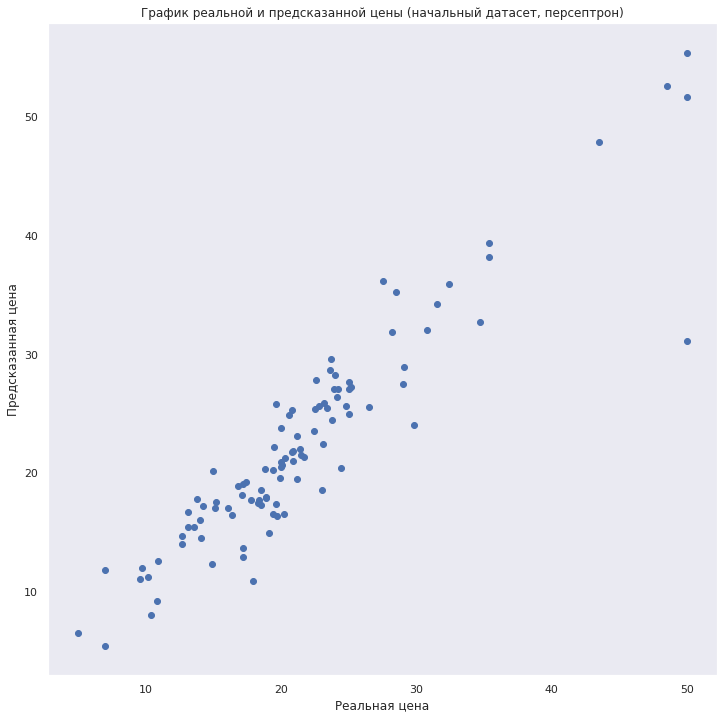

MSE: 3.524716541161222
R^2: 0.8305879478715166


In [ ]:
#model_pred = create_model(optimizer = grid_result.best_params_["optimizer"])
model_pred = create_model(optimizer = 'rmsprop')
#model_pred.fit(x_ftrain, y_ftrain, batch_size = grid_result.best_params_["batch_size"], epochs = grid_result.best_params_["epochs"], verbose = 0)
model_pred.fit(x_ftrain, y_ftrain, batch_size = 10, epochs = 100, verbose = 0)
y_pred = model_pred.predict(x_ftest)
plt.scatter(y_ftest, y_pred)
plt.grid()
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("График реальной и предсказанной цены (начальный датасет, персептрон)")
plt.show()
print("MSE:", np.sqrt(mean_squared_error(y_ftest, y_pred)))
print("R^2:", r2_score(y_ftest, y_pred))

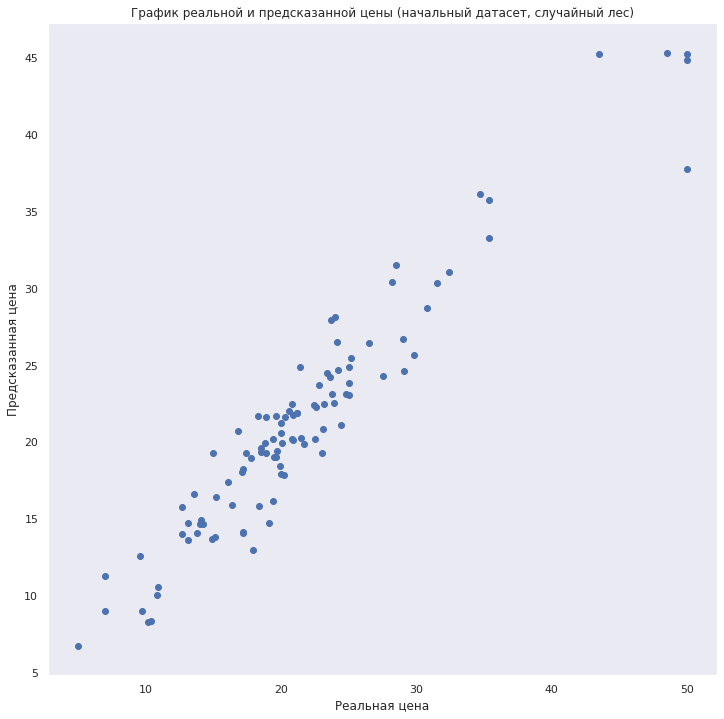

MSE: 2.5108874865664723
R^2: 0.9140293095691924


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#target_n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
#target_max_features = [0.5, 'auto', 'sqrt', 'log2']
#target_min_samples_leaf = [1, 2, 4]
#target_bootstrap = [True, False]
#hps = dict(n_estimators = target_n_estimators, max_features = target_max_features, min_samples_leaf = target_min_samples_leaf, bootstrap = target_bootstrap)
#forest_model = RandomForestRegressor()
#grid = GridSearchCV(estimator = forest_model, param_grid = hps)
#grid_result = grid.fit(x_ftrain_scaled, y_ftrain)
#display(grid_result.best_params_)
#display(grid_result.best_score_)
forest_model = RandomForestRegressor(n_estimators = 250, max_features = 0.5, min_samples_leaf = 1, bootstrap = False)
forest_model.fit(x_ftrain, y_ftrain)
y_pred = forest_model.predict(x_ftest)
plt.scatter(y_ftest, y_pred)
plt.grid()
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("График реальной и предсказанной цены (начальный датасет, случайный лес)")
plt.show()
print("MSE:", np.sqrt(mean_squared_error(y_ftest, y_pred)))
print("R^2:", r2_score(y_ftest, y_pred))

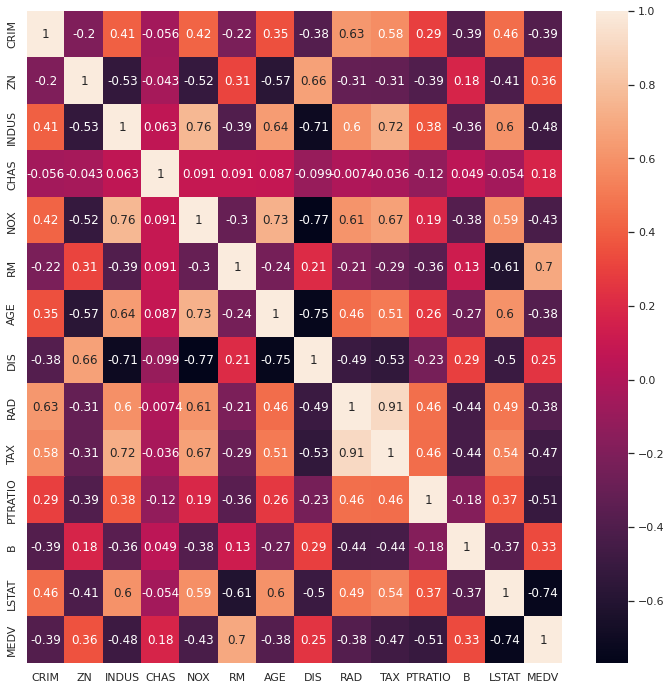

In [ ]:
correlation_matrix = boston.corr()
sns.heatmap(data = correlation_matrix, annot=True)

In [ ]:
not_correlate_features = ['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B']
boston_correlate = boston.copy()

In [ ]:
for i in range(len(not_correlate_features)):
  boston_correlate.drop(not_correlate_features[i], axis = 1, inplace = True)
boston_correlate.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,6.575,296.0,15.3,4.98,24.0
1,7.07,6.421,242.0,17.8,9.14,21.6
2,7.07,7.185,242.0,17.8,4.03,34.7
3,2.18,6.998,222.0,18.7,2.94,33.4
4,2.18,7.147,222.0,18.7,5.33,36.2


In [ ]:
y = boston_correlate['MEDV']
x = boston_correlate.drop('MEDV', axis = 1)
x = np.array(x)
y = np.array(y)
sc = StandardScaler()
x = sc.fit_transform(x)
x_ftrain, x_ftest, y_ftrain, y_ftest = train_test_split(x, y, test_size = 0.2, random_state = np_seed)

4/4 [==============================] - 0s 3ms/step


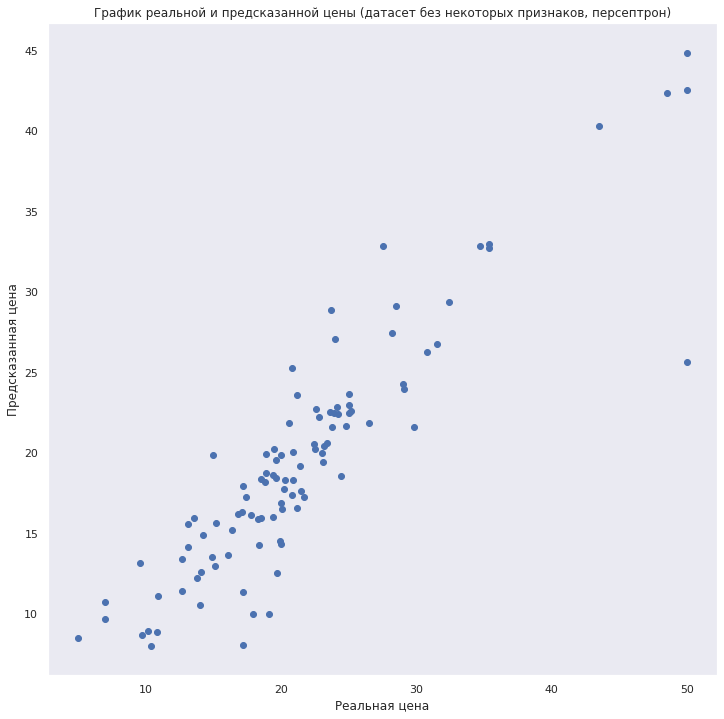

MSE: 4.205750291307856
R^2: 0.7587969043658129


In [ ]:
def create_model(optimizer = 'adam', init = 'uniform'):
  model = Sequential()
  model.add(Dense(64, input_dim = x_ftrain.shape[1], kernel_initializer = init, activation = 'relu'))
  model.add(Dense(32, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(16, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(64, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(1, kernel_initializer = init, activation = None))
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse'])
  #display(model.summary())
  return model
model_pred = create_model(optimizer = 'rmsprop')
model_pred.fit(x_ftrain, y_ftrain, batch_size = 10, epochs = 100, verbose = 0)
y_pred = model_pred.predict(x_ftest)
plt.scatter(y_ftest, y_pred)
plt.grid()
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("График реальной и предсказанной цены (датасет без некоторых признаков, персептрон)")
plt.show()
print("MSE:", np.sqrt(mean_squared_error(y_ftest, y_pred)))
print("R^2:", r2_score(y_ftest, y_pred))

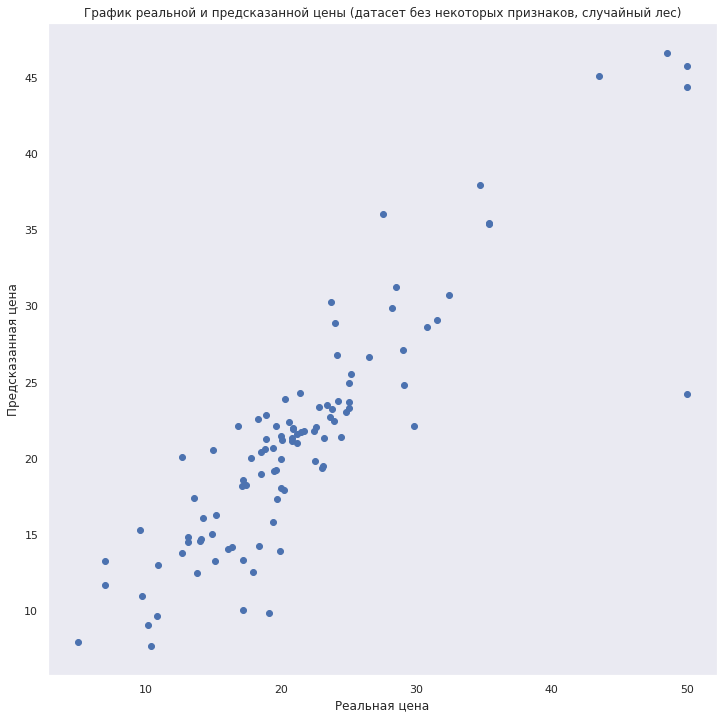

MSE: 4.044444272254539
R^2: 0.7769441481614063


In [ ]:
forest_model = RandomForestRegressor(n_estimators = 250, max_features = 0.5, min_samples_leaf = 1, bootstrap = False)
forest_model.fit(x_ftrain, y_ftrain)
y_pred = forest_model.predict(x_ftest)
plt.scatter(y_ftest, y_pred)
plt.grid()
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("График реальной и предсказанной цены (датасет без некоторых признаков, случайный лес)")
plt.show()
print("MSE:", np.sqrt(mean_squared_error(y_ftest, y_pred)))
print("R^2:", r2_score(y_ftest, y_pred))

In [ ]:
y = boston['MEDV']
x = boston.drop('MEDV', axis = 1)
x = np.array(x)
y = np.array(y)
sc = StandardScaler()
x = sc.fit_transform(x)
x_ftrain, x_ftest, y_ftrain, y_ftest = train_test_split(x, y, test_size = 0.2, random_state = np_seed)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x_poly = PolynomialFeatures(include_bias = False).fit_transform(sc.fit_transform(x))

In [ ]:
x_ftrain, x_ftest, y_ftrain, y_ftest = train_test_split(x, y, test_size = 0.2, random_state = np_seed)

4/4 [==============================] - 0s 4ms/step


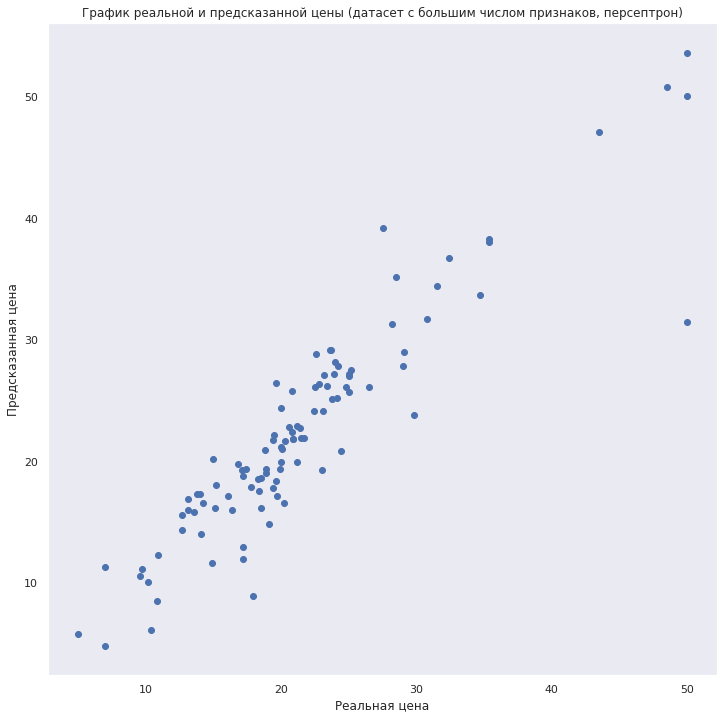

MSE: 3.67661887033902
R^2: 0.815671226340787


In [ ]:
def create_model(optimizer = 'adam', init = 'uniform'):
  model = Sequential()
  model.add(Dense(64, input_dim = x_ftrain.shape[1], kernel_initializer = init, activation = 'relu'))
  model.add(Dense(32, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(16, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(64, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(1, kernel_initializer = init, activation = None))
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse'])
  #display(model.summary())
  return model
model_pred = create_model(optimizer = 'rmsprop')
model_pred.fit(x_ftrain, y_ftrain, batch_size = 10, epochs = 100, verbose = 0)
y_pred = model_pred.predict(x_ftest)
plt.scatter(y_ftest, y_pred)
plt.grid()
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("График реальной и предсказанной цены (датасет с большим числом признаков, персептрон)")
plt.show()
print("MSE:", np.sqrt(mean_squared_error(y_ftest, y_pred)))
print("R^2:", r2_score(y_ftest, y_pred))

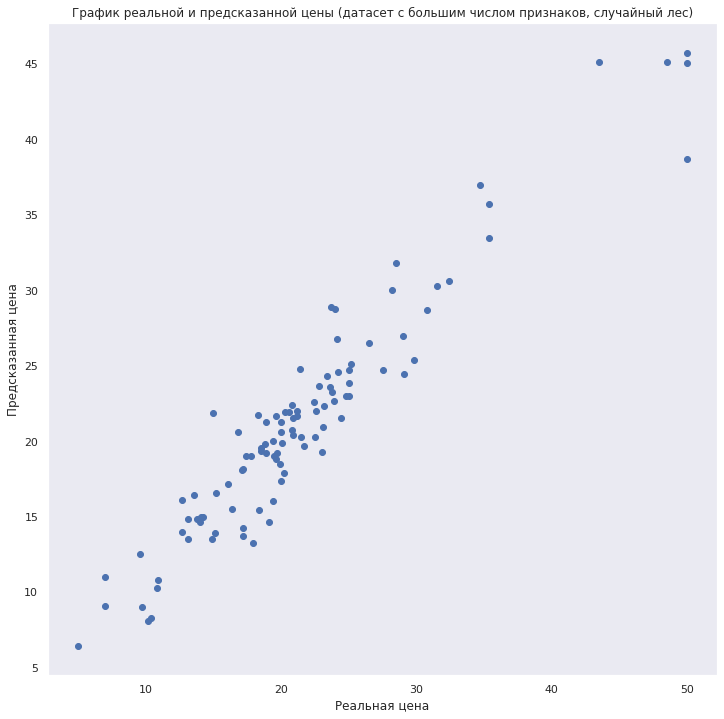

MSE: 2.55127822296597
R^2: 0.9112411730245755


In [ ]:
forest_model = RandomForestRegressor(n_estimators = 250, max_features = 0.5, min_samples_leaf = 1, bootstrap = False)
forest_model.fit(x_ftrain, y_ftrain)
y_pred = forest_model.predict(x_ftest)
plt.scatter(y_ftest, y_pred)
plt.grid()
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("График реальной и предсказанной цены (датасет с большим числом признаков, случайный лес)")
plt.show()
print("MSE:", np.sqrt(mean_squared_error(y_ftest, y_pred)))
print("R^2:", r2_score(y_ftest, y_pred))